In [1]:
!pip install numpy pandas matplotlib scikit-learn tensorflow

In [2]:
import pandas as pd

# Load the data
data = pd.read_csv("/home/akz-portable/programming/Datasets/Lung_Cancer/lung_cancer_examples.csv")
data

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1
5,Cristiano,Ronaldo,34,0,10,0,0
6,Mihail,Tal,58,15,10,0,0
7,Kathy,Bates,22,12,5,2,0
8,Nicole,Kidman,45,2,6,0,0
9,Ray,Milland,52,18,4,5,1


In [3]:
!pip install seaborn

     Name      Surname  Age  Smokes  AreaQ  Alkhol  Result
0    John         Wick   35       3      5       4       1
1    John  Constantine   27      20      2       5       1
2  Camela     Anderson   30       0      5       2       0
3    Alex       Telles   28       0      8       1       0
4   Diego     Maradona   68       4      5       6       1
Name       object
Surname    object
Age         int64
Smokes      int64
AreaQ       int64
Alkhol      int64
Result      int64
dtype: object
             Age     Smokes      AreaQ     Alkhol     Result
count  59.000000  59.000000  59.000000  59.000000  59.000000
mean   42.627119  15.067797   5.203390   3.237288   0.474576
std    16.235230   7.984607   2.461984   2.380517   0.503640
min    18.000000   0.000000   1.000000   0.000000   0.000000
25%    29.000000  10.000000   3.000000   1.000000   0.000000
50%    39.000000  15.000000   5.000000   3.000000   0.000000
75%    55.000000  20.000000   7.500000   5.000000   1.000000
max    77.000000  

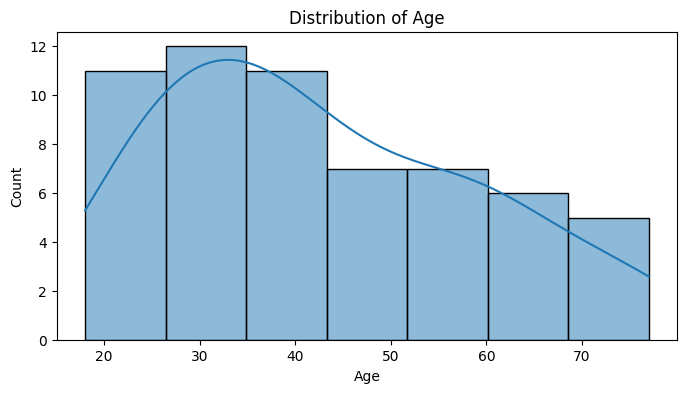

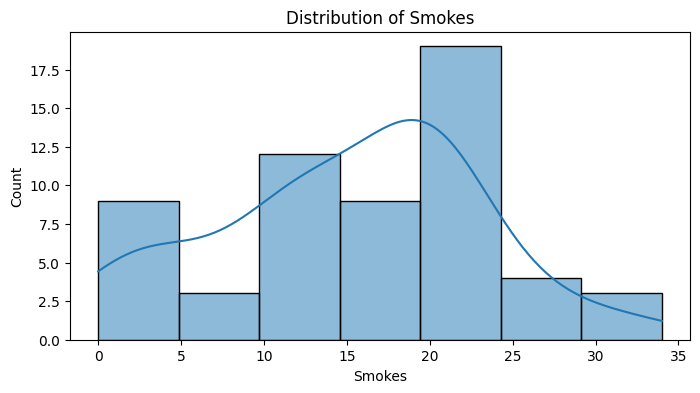

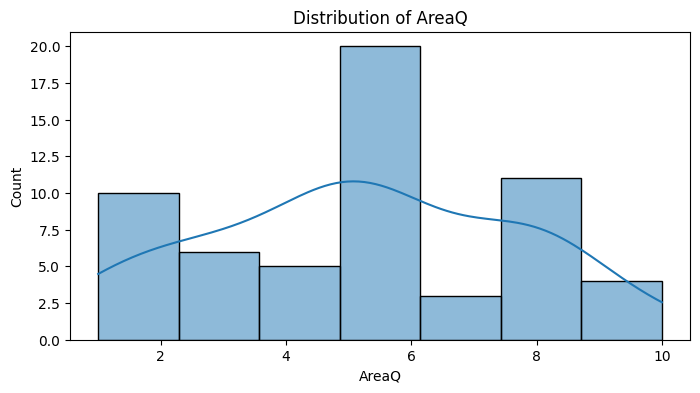

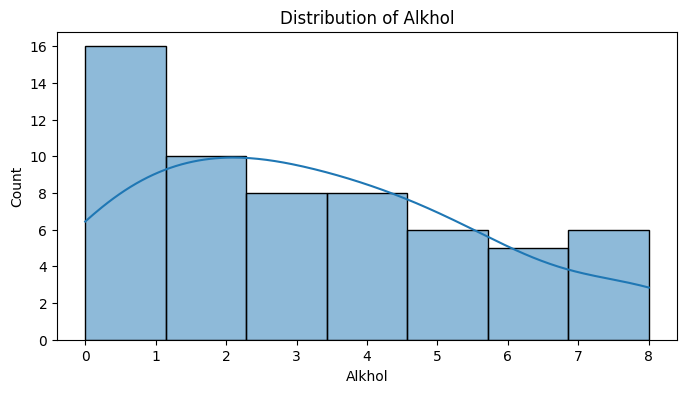

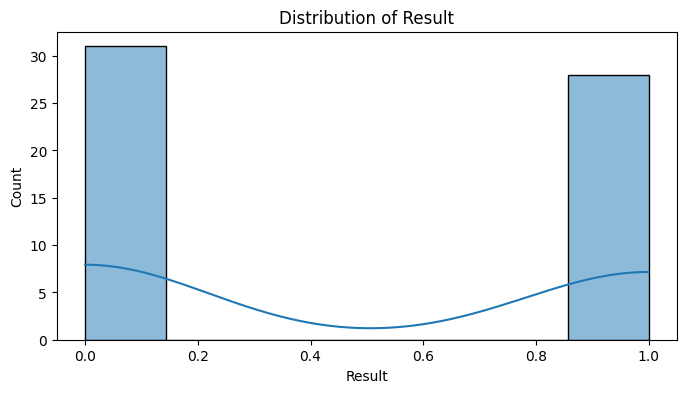

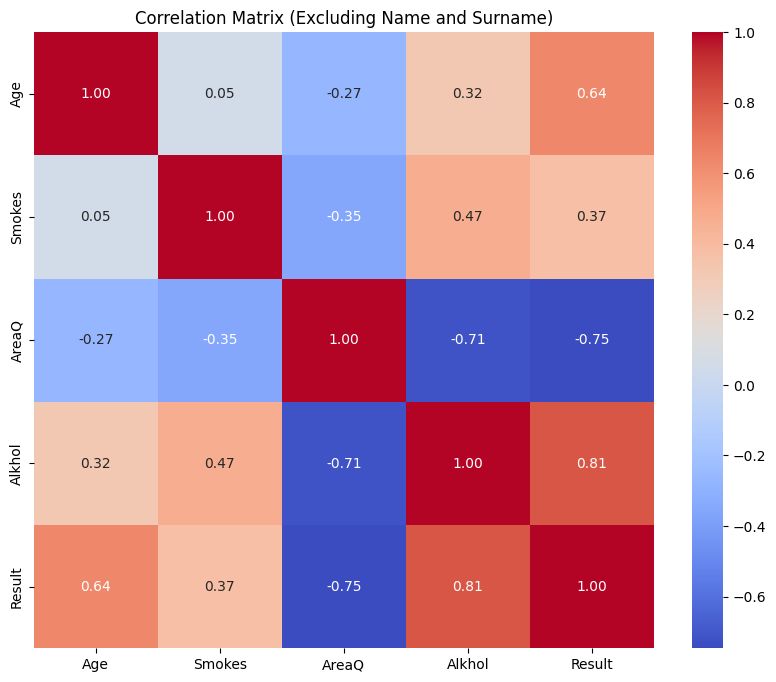

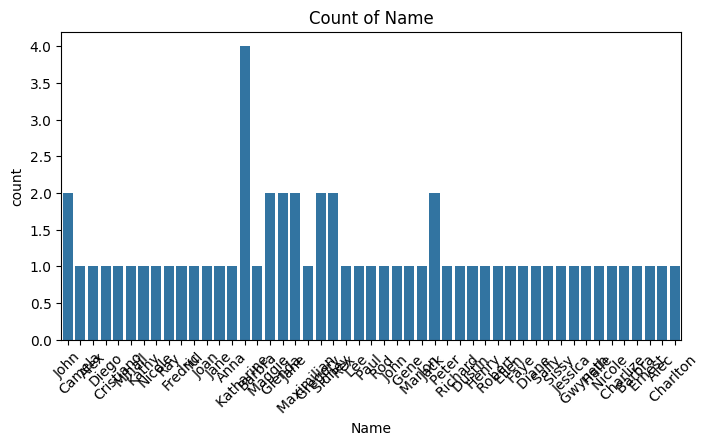

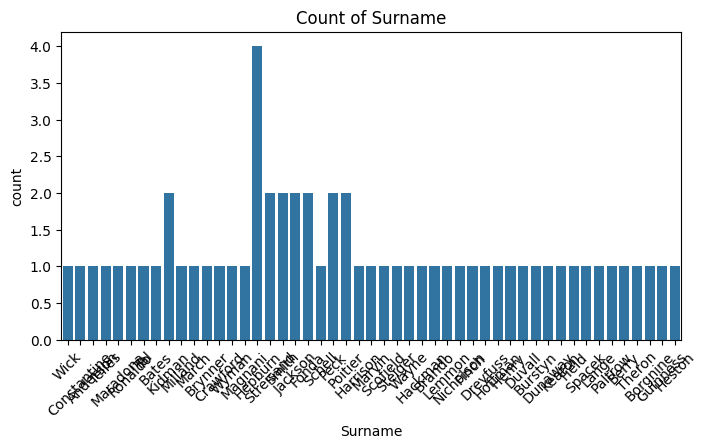

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print(data.head())

# Display the data types of each column
print(data.dtypes)

# Summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Visualize the distribution of numerical features
numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=data, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Drop 'Name' and 'Surname' columns
data_numeric = data.select_dtypes(include=[np.number])

# Visualize the correlation matrix
correlation_matrix = data_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Excluding Name and Surname)')
plt.show()


# Explore categorical variables
categorical_features = data.select_dtypes(include=[object]).columns.tolist()
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=feature)
    plt.title(f'Count of {feature}')
    plt.xticks(rotation=45)
    plt.show()



In [5]:
def evaluate_model(classifier, X_train, X_test, y_train, y_test, cv=5):
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    from sklearn.metrics import roc_auc_score, average_precision_score, matthews_corrcoef
    from sklearn.metrics import log_loss, balanced_accuracy_score, confusion_matrix, classification_report
    from sklearn.model_selection import learning_curve
    from sklearn.metrics import roc_curve, auc
    # Train the model
    classifier.fit(X_train, y_train)

    # Make predictions
    y_pred = classifier.predict(X_test)

    # Calculate and print metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    average_precision = average_precision_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    logloss = log_loss(y_test, y_pred)
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)
    print("AUC-ROC:", roc_auc)
    print("AUC-PR (Average Precision):", average_precision)
    print("Matthew's Correlation Coefficient (MCC):", mcc)
    print("Log Loss:", logloss)
    print("Balanced Accuracy:", balanced_acc)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()

    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()

    # Plot learning curve
    train_sizes, train_scores, test_scores = learning_curve(
        classifier, X_train, y_train, cv=cv, train_sizes=np.linspace(0.1, 1.0, 5), scoring='accuracy', n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.title("Learning Curve")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-',
             color="r", label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-',
             color="g", label="Cross-validation Score")
    plt.legend(loc="best")
    plt.show()


Training Logistic Regression...
Accuracy: 0.9166666666666666
Precision: 1.0
Recall: 0.75
F1-Score: 0.8571428571428571
AUC-ROC: 0.875
AUC-PR (Average Precision): 0.8333333333333334
Matthew's Correlation Coefficient (MCC): 0.816496580927726
Log Loss: 3.0036377824264293
Balanced Accuracy: 0.875
Confusion Matrix:
[[8 0]
 [1 3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.75      0.86         4

    accuracy                           0.92        12
   macro avg       0.94      0.88      0.90        12
weighted avg       0.93      0.92      0.91        12



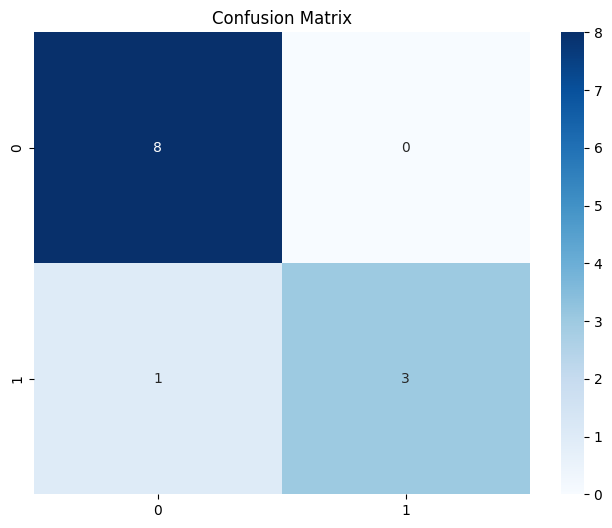

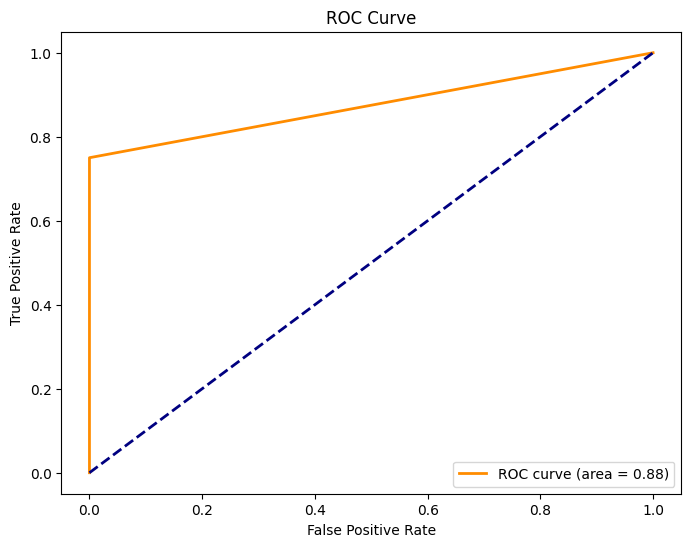

/home/akz-portable/programming/NNML-SRM/.venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
1 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/akz-portable/programming/NNML-SRM/.venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/akz-portable/programming/NNML-SRM/.venv/lib/python3.11/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/akz-portabl

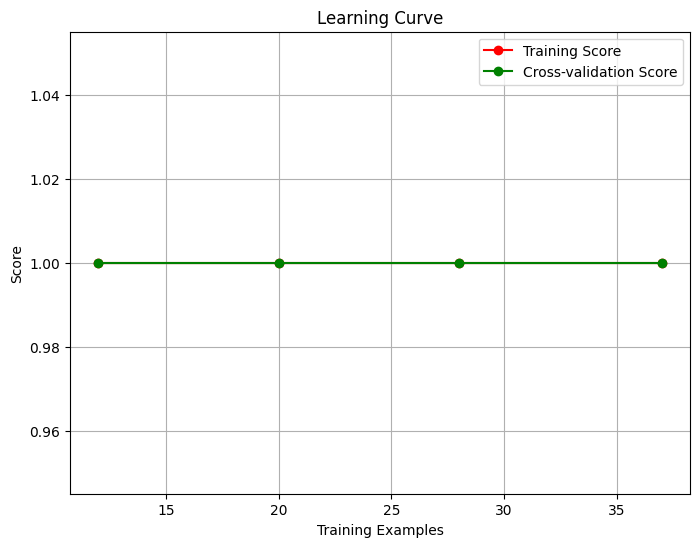



Training Random Forest...
Accuracy: 0.9166666666666666
Precision: 1.0
Recall: 0.75
F1-Score: 0.8571428571428571
AUC-ROC: 0.875
AUC-PR (Average Precision): 0.8333333333333334
Matthew's Correlation Coefficient (MCC): 0.816496580927726
Log Loss: 3.0036377824264293
Balanced Accuracy: 0.875
Confusion Matrix:
[[8 0]
 [1 3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.75      0.86         4

    accuracy                           0.92        12
   macro avg       0.94      0.88      0.90        12
weighted avg       0.93      0.92      0.91        12



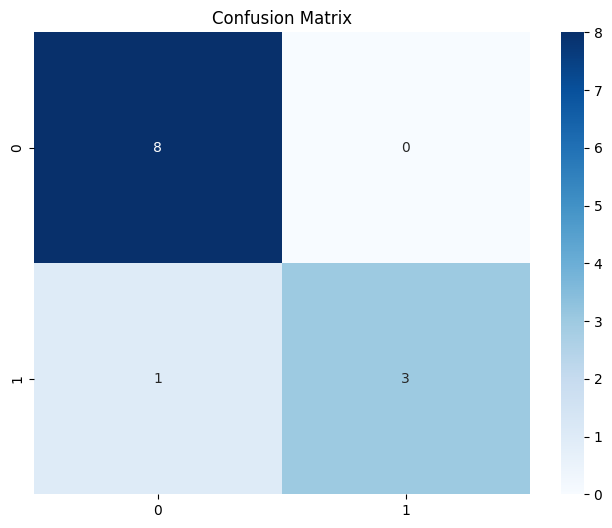

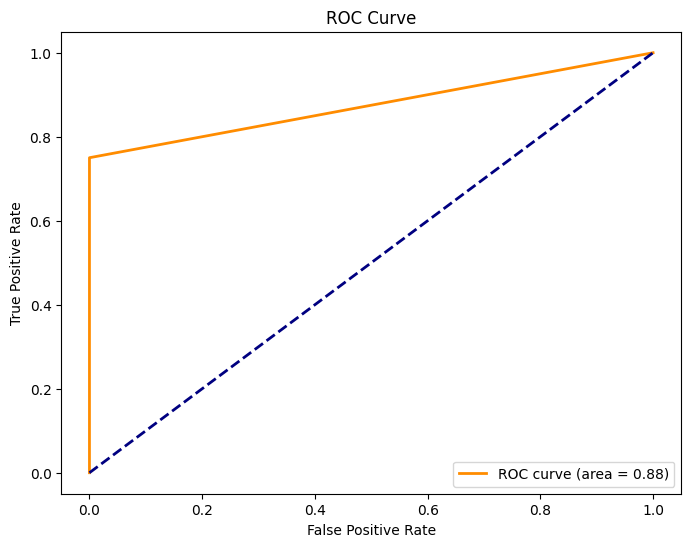

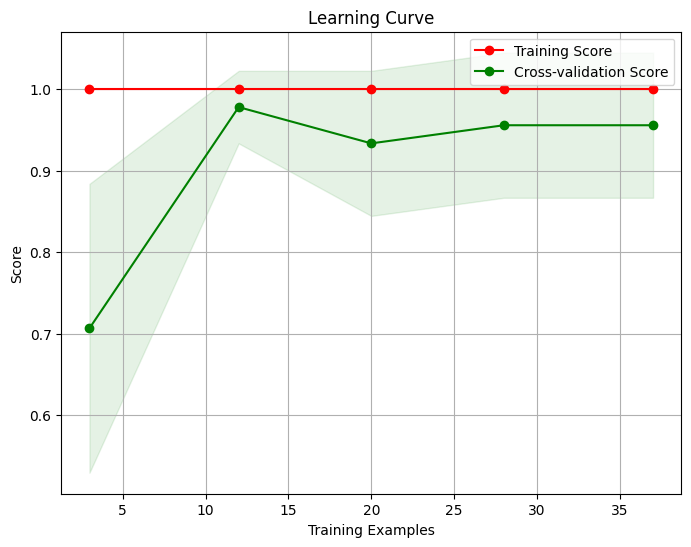



Training Support Vector Machine...
Accuracy: 0.9166666666666666
Precision: 1.0
Recall: 0.75
F1-Score: 0.8571428571428571
AUC-ROC: 0.875
AUC-PR (Average Precision): 0.8333333333333334
Matthew's Correlation Coefficient (MCC): 0.816496580927726
Log Loss: 3.0036377824264293
Balanced Accuracy: 0.875
Confusion Matrix:
[[8 0]
 [1 3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.75      0.86         4

    accuracy                           0.92        12
   macro avg       0.94      0.88      0.90        12
weighted avg       0.93      0.92      0.91        12



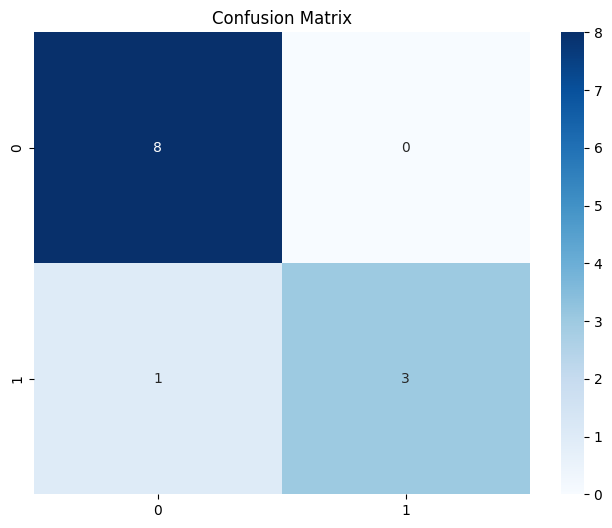

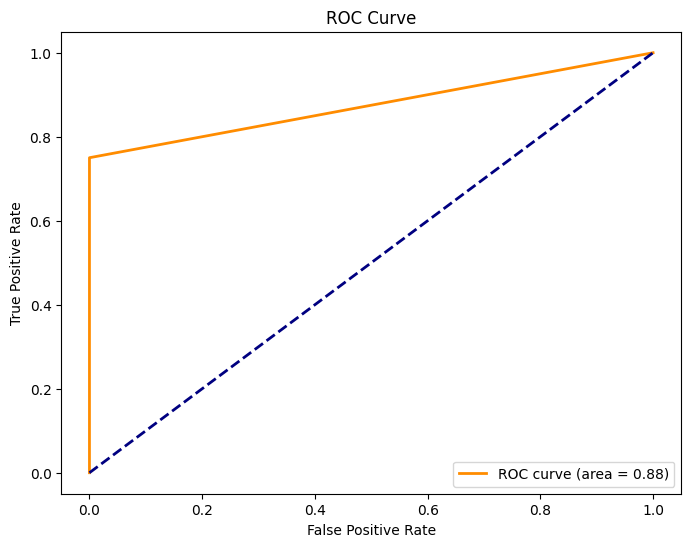

/home/akz-portable/programming/NNML-SRM/.venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
1 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/akz-portable/programming/NNML-SRM/.venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/akz-portable/programming/NNML-SRM/.venv/lib/python3.11/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/akz-portabl

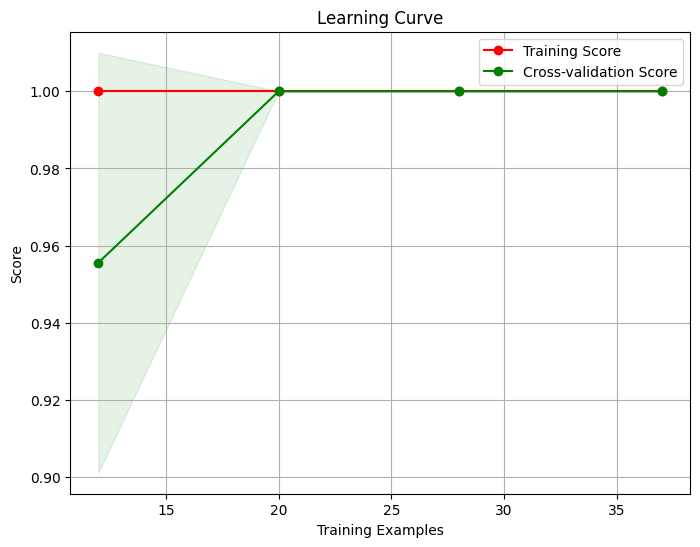



Training K-Nearest Neighbors...
Accuracy: 0.9166666666666666
Precision: 1.0
Recall: 0.75
F1-Score: 0.8571428571428571
AUC-ROC: 0.875
AUC-PR (Average Precision): 0.8333333333333334
Matthew's Correlation Coefficient (MCC): 0.816496580927726
Log Loss: 3.0036377824264293
Balanced Accuracy: 0.875
Confusion Matrix:
[[8 0]
 [1 3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.75      0.86         4

    accuracy                           0.92        12
   macro avg       0.94      0.88      0.90        12
weighted avg       0.93      0.92      0.91        12



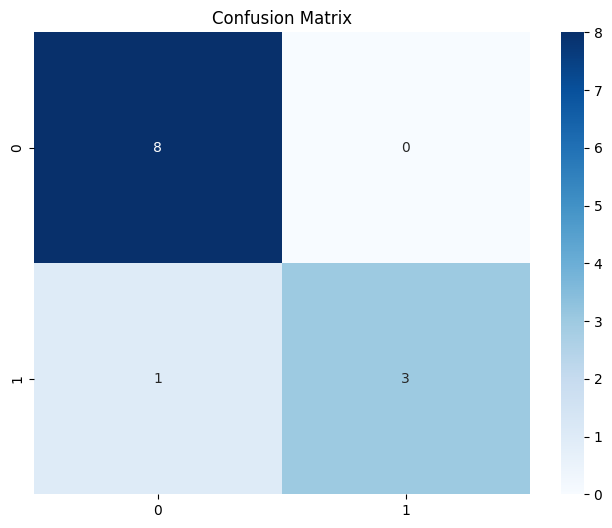

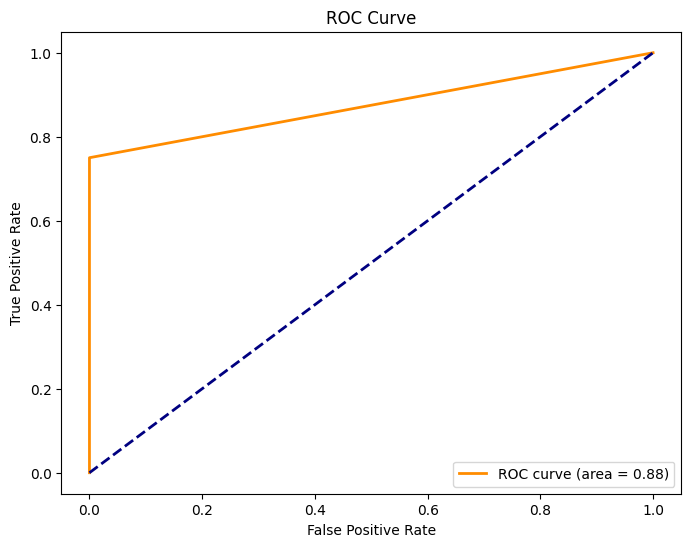

/home/akz-portable/programming/NNML-SRM/.venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/akz-portable/programming/NNML-SRM/.venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/akz-portable/programming/NNML-SRM/.venv/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/akz-portable/programming/NNML-SRM/.venv/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 345, in _score
    y_pred = method_c

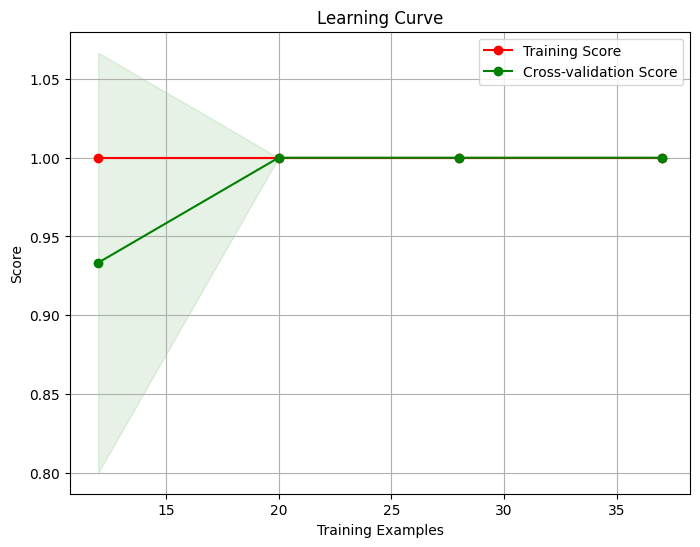



Training Decision Tree...
Accuracy: 0.9166666666666666
Precision: 1.0
Recall: 0.75
F1-Score: 0.8571428571428571
AUC-ROC: 0.875
AUC-PR (Average Precision): 0.8333333333333334
Matthew's Correlation Coefficient (MCC): 0.816496580927726
Log Loss: 3.0036377824264293
Balanced Accuracy: 0.875
Confusion Matrix:
[[8 0]
 [1 3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.75      0.86         4

    accuracy                           0.92        12
   macro avg       0.94      0.88      0.90        12
weighted avg       0.93      0.92      0.91        12



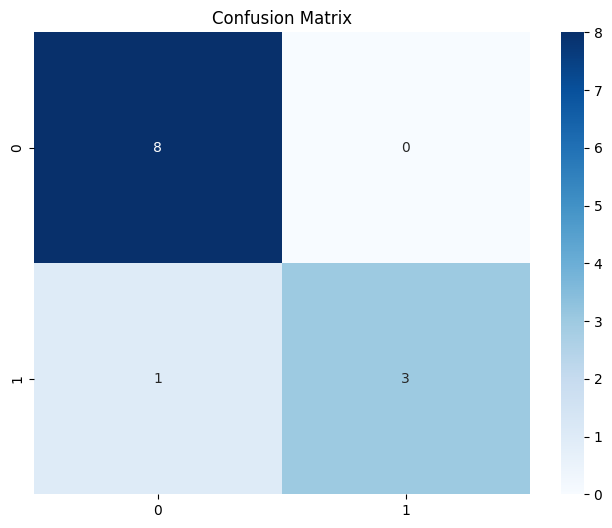

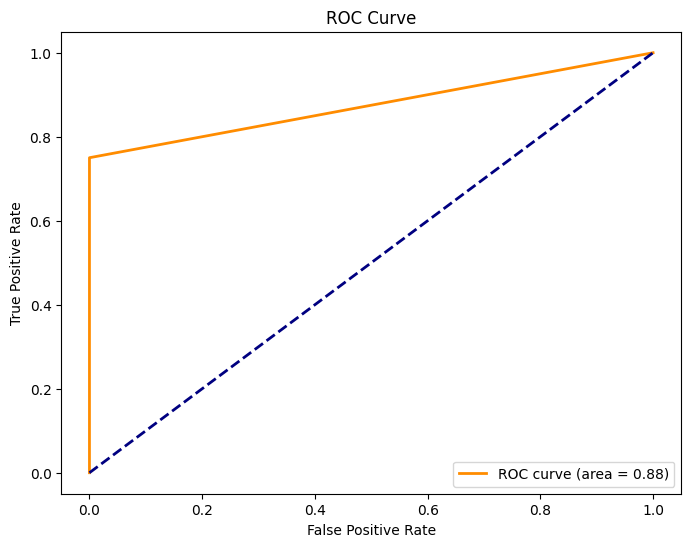

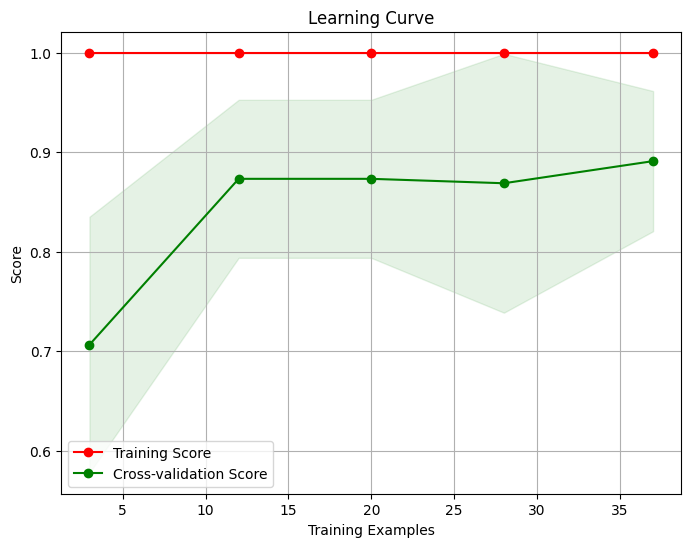



Training Naive Bayes...
Accuracy: 0.9166666666666666
Precision: 1.0
Recall: 0.75
F1-Score: 0.8571428571428571
AUC-ROC: 0.875
AUC-PR (Average Precision): 0.8333333333333334
Matthew's Correlation Coefficient (MCC): 0.816496580927726
Log Loss: 3.0036377824264293
Balanced Accuracy: 0.875
Confusion Matrix:
[[8 0]
 [1 3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.75      0.86         4

    accuracy                           0.92        12
   macro avg       0.94      0.88      0.90        12
weighted avg       0.93      0.92      0.91        12



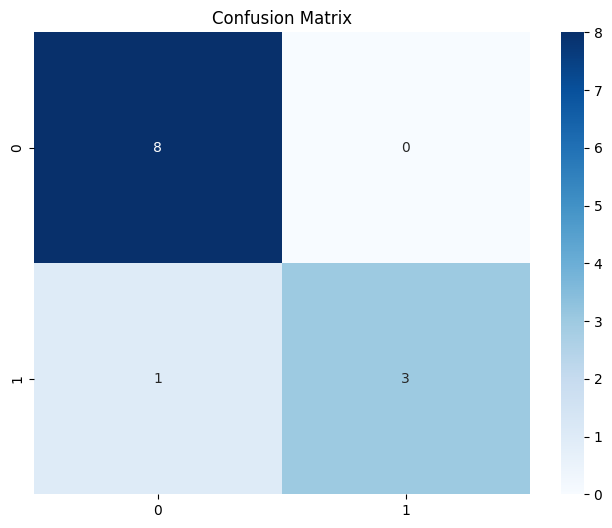

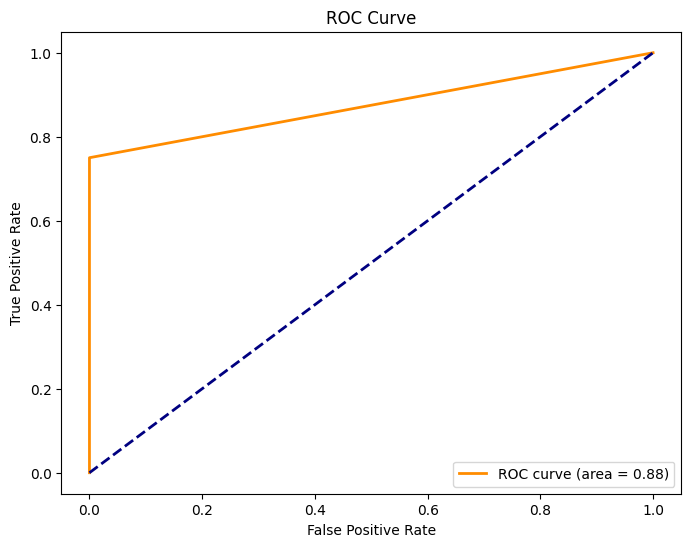

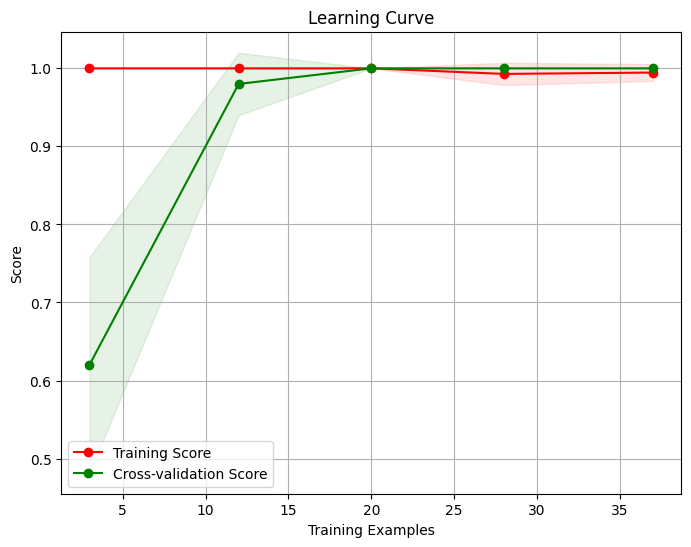

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Splitting data into features and target variable
X = data.drop(columns=['Result', 'Name', 'Surname'])
y = data['Result']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defining classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB()
}

# Training and evaluating models
for name, clf in classifiers.items():
    print(f"Training {name}...")
    evaluate_model(clf, X_train_scaled, X_test_scaled, y_train, y_test)
    print("\n")
